# Modeling the strength of concrete with ANNS

Rosa Karina Torres Calderon

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from IPython.display import Image

Using TensorFlow backend.


# Step 1- Reading the data set

In [2]:
concrete = pd.read_csv("concrete.csv")
print(concrete.head(5))
print(" ")
print('Tamaño del data frame: ' + str(concrete.shape))

   cement   slag  ash  water  superplastic  coarseagg  fineagg  age  strength
0   540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28     79.99
1   540.0    0.0  0.0  162.0           2.5     1055.0    676.0   28     61.89
2   332.5  142.5  0.0  228.0           0.0      932.0    594.0  270     40.27
3   332.5  142.5  0.0  228.0           0.0      932.0    594.0  365     41.05
4   198.6  132.4  0.0  192.0           0.0      978.4    825.5  360     44.30
 
Tamaño del data frame: (1030, 9)


# Step 2- Exploring and preparing the data

In [3]:
print(concrete.dtypes)

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object


In [4]:
#Normalize dataset
min_max_scaler = preprocessing.MinMaxScaler()
concrete_norm= min_max_scaler.fit_transform(concrete)
concrete_norm = pd.DataFrame(concrete_norm)
concrete_norm.columns = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']
print(concrete_norm.head(3))

     cement      slag  ash     water  superplastic  coarseagg  fineagg  \
0  1.000000  0.000000  0.0  0.321086       0.07764   0.694767  0.20572   
1  1.000000  0.000000  0.0  0.321086       0.07764   0.738372  0.20572   
2  0.526256  0.396494  0.0  0.848243       0.00000   0.380814  0.00000   

        age  strength  
0  0.074176  0.967485  
1  0.074176  0.741996  
2  0.739011  0.472655  


/Users/karinatorres/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
print('Datos estadísticos para dataset sin normalizar')
print(concrete.strength.describe())
print('')
print('Datos estadísticos para dataset normalizado')
print(concrete_norm.strength.describe())

Datos estadísticos para dataset sin normalizar
count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

Datos estadísticos para dataset normalizado
count    1030.000000
mean        0.417191
std         0.208119
min         0.000000
25%         0.266351
50%         0.400087
75%         0.545721
max         1.000000
Name: strength, dtype: float64


# Step 3- Training a Model on the data

In [6]:
# Split the data with 75% of the exmaples and a testing set with 25%
concrete_norm_features = concrete_norm.drop(['strength'],axis =1)
concrete_norm_target = concrete_norm.iloc[:,8:]
X_train, X_test, y_train, y_test = train_test_split(concrete_norm_features, concrete_norm_target, test_size=0.25, random_state=69)
print('Dataset train: ' + str(X_train.shape))
print()
print('Dataset test: ' + str(X_test.shape))

Dataset train: (772, 8)

Dataset test: (258, 8)


Training a simple multilayer feedforward network with only a single hidden node

In [7]:
model = keras.models.Sequential([
        keras.layers.Dense(1, activation="linear", input_shape=X_train.shape[1:])
        ])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


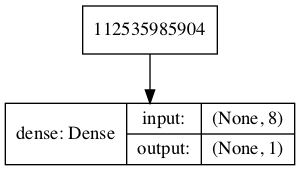

In [9]:

plot_model(model, to_file='rnn.png', show_shapes=True, show_layer_names=True)

Image(filename='rnn.png')

In [10]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=['accuracy']) 

Instructions for updating:
Use tf.cast instead.


In [11]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.1)

Train on 694 samples, validate on 78 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
694/694 [==============================] - 1s 1ms/sample - loss: 0.4664 - acc: 0.0000e+00 - val_loss: 0.2620 - val_acc: 0.0000e+00
Epoch 2/40
694/694 [==============================] - 0s 48us/sample - loss: 0.2468 - acc: 0.0000e+00 - val_loss: 0.1906 - val_acc: 0.0000e+00
Epoch 3/40
694/694 [==============================] - 0s 48us/sample - loss: 0.2027 - acc: 0.0000e+00 - val_loss: 0.1732 - val_acc: 0.0000e+00
Epoch 4/40
694/694 [==============================] - 0s 46us/sample - loss: 0.1871 - acc: 0.0000e+00 - val_loss: 0.1641 - val_acc: 0.0000e+00
Epoch 5/40
694/694 [==============================] - 0s 47us/sample - loss: 0.1765 - acc: 0.0000e+00 - val_loss: 0.1568 - val_acc: 0.0000e+00
Epoch 6/40
694/694 [==============================] - 0s 47us/sample - loss: 0.1673 - acc: 0.0000e+00 - val_loss: 0.1500 - val_acc: 0.0000e+00
Epoch 7/40
694/694 [==============================

# Step 4- Evaluating model performance

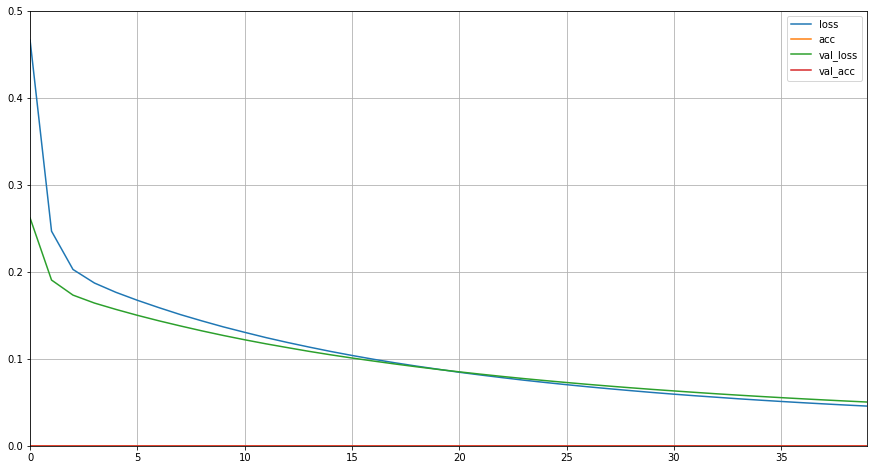

In [12]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0, 0.5) # set the vertical range to [0-1]
plt.show()

In [13]:
score, acc = model.evaluate(X_train, y_train)
print('Test score:', score)
print('Test accuracy:', acc)


772/772 [==============================] - 0s 24us/sample - loss: 0.0455 - acc: 0.0000e+00
Test score: 0.045499420691030634
Test accuracy: 0.0


In [14]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

258/258 [==============================] - 0s 31us/sample - loss: 0.0472 - acc: 0.0039
Test score: 0.04724134600093199
Test accuracy: 0.003875969


In [15]:
y_pred = model.predict(X_train)

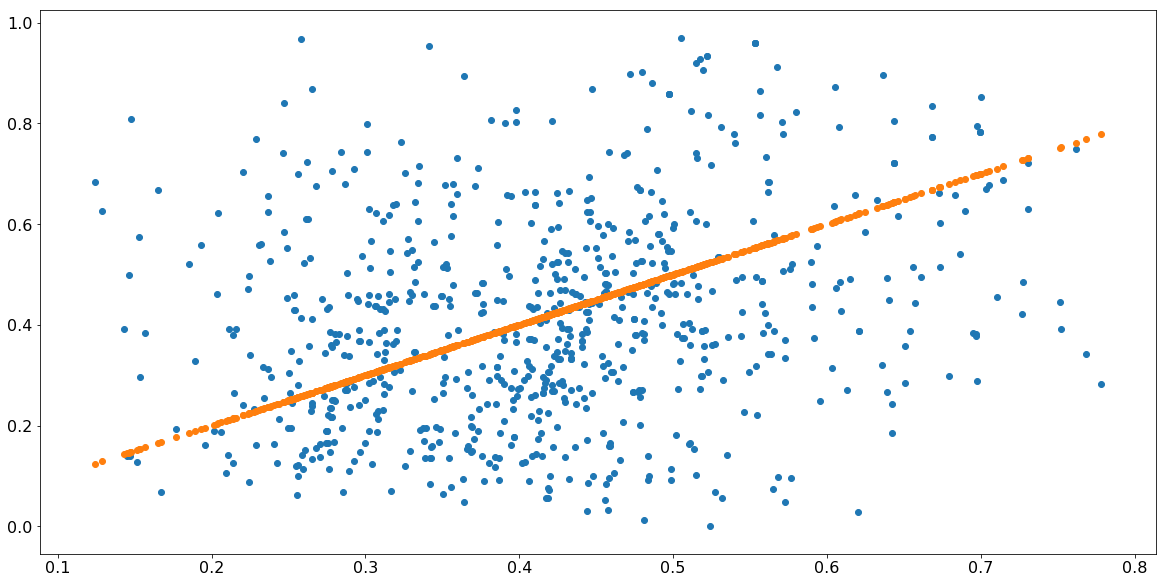

In [16]:
plt.figure(figsize=(20,10))
plt.rc('font',size = 16)
plt.scatter(y_pred, y_train)
plt.scatter(y_pred, y_pred)
plt.show()

In [17]:
for a, b in zip(np.array(y_train),model.predict(X_train)):
    print (a," ", b)

[0.57954404]   [0.48998594]
[0.49009593]   [0.42459542]
[0.12109132]   [0.25609502]
[0.43739878]   [0.30595383]
[0.3556746]   [0.44051522]
[0.45396786]   [0.24907087]
[0.23097047]   [0.31141794]
[0.85922512]   [0.497034]
[0.42743242]   [0.31291854]
[0.64768905]   [0.44391835]
[0.03201694]   [0.45772493]
[0.29874175]   [0.38548487]
[0.1541049]   [0.3660407]
[0.06752211]   [0.16683795]
[0.85175034]   [0.69979495]
[0.09007101]   [0.40662298]
[0.15161331]   [0.26057655]
[0.17652921]   [0.39650822]
[0.44711598]   [0.38934997]
[0.32104148]   [0.63608164]
[0.7984303]   [0.30109045]
[0.29737137]   [0.35142323]
[0.42319671]   [0.41812027]
[0.28267099]   [0.31193095]
[0.28466426]   [0.4255372]
[0.48012956]   [0.49971044]
[0.15036751]   [0.3290922]
[0.38270836]   [0.50237733]
[0.306964]   [0.5490401]
[0.60707612]   [0.48156917]
[0.52173913]   [0.3522212]
[0.44325402]   [0.65709865]
[0.33499439]   [0.43350637]
[0.45758067]   [0.34935182]
[0.38881276]   [0.29614046]
[0.34309206]   [0.5633832]
[0.26

[0.93397284]   [0.5220448]
[0.04920892]   [0.5729601]
[0.1260745]   [0.38045782]
[0.35866451]   [0.26345274]
[0.85922512]   [0.497034]
[0.29450604]   [0.45584324]
[0.64083717]   [0.32018465]
[0.24392675]   [0.25255296]
[0.15871434]   [0.36671877]
[0.38283294]   [0.6947189]
[0.51289398]   [0.30296373]
[0.13653918]   [0.34232616]
[0.38445247]   [0.55857456]
[0.29811885]   [0.40550506]
[0.30546904]   [0.31860995]
[0.32353308]   [0.4576028]
[0.24230721]   [0.38508785]
[0.57082347]   [0.32776615]
[0.13865703]   [0.14488122]
[0.57767535]   [0.5656699]
[0.68145011]   [0.334262]
[0.71209667]   [0.37297437]
[0.31767784]   [0.4063442]
[0.66363523]   [0.5613838]
[0.0773639]   [0.35584733]
[0.68855114]   [0.7146869]
[0.66413355]   [0.48536348]
[0.46057057]   [0.31550393]
[0.22112869]   [0.27588832]
[0.3873178]   [0.5190333]
[0.51538557]   [0.65618414]
[0.64843653]   [0.63224137]
[0.4317927]   [0.27481872]
[0.55923757]   [0.23095739]
[0.1857481]   [0.35837045]
[0.80702629]   [0.38145328]
[0.4907188

[0.88027906]   [0.486235]
[0.62526473]   [0.6894588]
[0.05581164]   [0.41849232]
[0.67870936]   [0.35712507]
[0.37859723]   [0.6965857]
[0.90519497]   [0.51933813]
[0.44088701]   [0.4450934]
[0.23483244]   [0.2778055]
[0.12358291]   [0.3042259]
[0.46044599]   [0.3378864]
[0.13965367]   [0.37565923]
[0.64320419]   [0.3319313]
[0.09231344]   [0.48366556]
[0.43714962]   [0.3066195]
[0.65690794]   [0.6184211]
[0.40824717]   [0.4811385]
[0.30559362]   [0.41875964]
[0.46156721]   [0.20331222]
[0.06864333]   [0.2854678]
[0.56858104]   [0.47520107]
[0.48635854]   [0.55782646]
[0.36152984]   [0.4638822]
[0.16556621]   [0.45875198]
[0.12956273]   [0.29265985]
[0.2679706]   [0.422667]
[0.3605332]   [0.27795294]
[0.52672231]   [0.4791904]
[0.38968481]   [0.36048713]
[0.18138782]   [0.5020193]
[0.1199701]   [0.32594034]
[0.48299489]   [0.4890985]
[0.13653918]   [0.3420652]
[0.42942569]   [0.2540976]
[0.27158341]   [0.4334188]
[0.29139155]   [0.40278885]
[0.58377974]   [0.47145787]
[0.25052946]   [0

In [18]:
y_pred= model.predict(X_test)

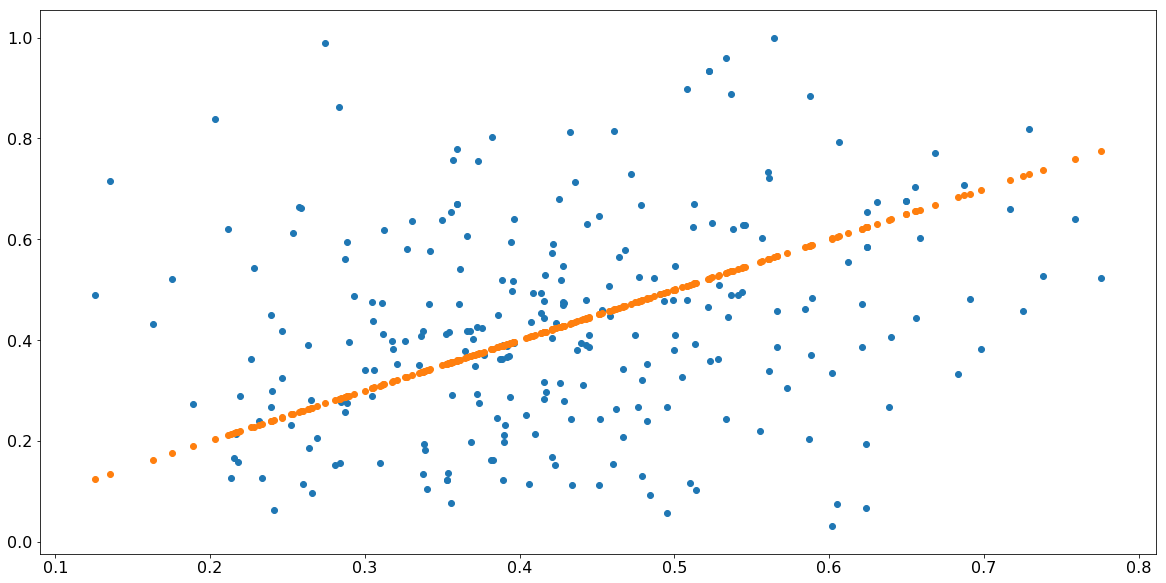

In [19]:
plt.figure(figsize=(20,10))
plt.rc('font',size = 16)
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)
plt.show()

In [20]:
for a, b in zip(np.array(y_test),model.predict(X_test)):
    print (a," ", b)

[0.45683319]   [0.72528553]
[0.11523608]   [0.40631968]
[0.62127819]   [0.2117703]
[0.31655662]   [0.41584688]
[0.1138657]   [0.25983036]
[0.12271085]   [0.3890947]
[0.12732029]   [0.23379709]
[0.19471783]   [0.6238791]
[0.26809518]   [0.4953472]
[0.86321166]   [0.2834179]
[0.25663386]   [0.28704703]
[0.16307462]   [0.38260514]
[0.59486732]   [0.28821722]
[0.30409867]   [0.57277393]
[0.48237199]   [0.69073486]
[0.49283668]   [0.40854472]
[0.5194967]   [0.4265957]
[0.54329139]   [0.22849506]
[0.54702878]   [0.500192]
[0.41148623]   [0.31193095]
[0.39815622]   [0.32580197]
[0.34334122]   [0.4665212]
[0.45683319]   [0.5665191]
[0.06316183]   [0.24112171]
[0.24405133]   [0.45174336]
[0.07524604]   [0.60512096]
[0.41759063]   [0.33742142]
[0.15335742]   [0.46024758]
[0.52024418]   [0.17557642]
[0.48361779]   [0.5886015]
[0.39392052]   [0.4395666]
[0.29986296]   [0.24017303]
[0.73389809]   [0.5605533]
[0.43640214]   [0.4072557]
[0.13541796]   [0.3535733]
[0.41783979]   [0.36617947]
[0.407998

# Step 5- Improving model performance

Training the ANNs increasing the number of hidden nodes

In [21]:
model2 = keras.models.Sequential([
        keras.layers.Dense(5, activation="linear", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
        ])

In [22]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


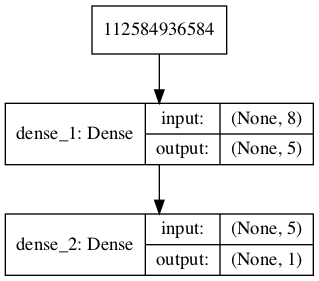

In [23]:
plot_model(model2, to_file='rnn2.png', show_shapes=True, show_layer_names=True)
Image(filename='rnn2.png')

In [24]:
model2.compile(loss="mean_squared_error", optimizer="sgd", metrics=['accuracy']) 

In [25]:
history = model2.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.1)

Train on 694 samples, validate on 78 samples
Epoch 1/40
694/694 [==============================] - 1s 862us/sample - loss: 0.1161 - acc: 0.0014 - val_loss: 0.0436 - val_acc: 0.0000e+00
Epoch 2/40
694/694 [==============================] - 0s 51us/sample - loss: 0.0390 - acc: 0.0014 - val_loss: 0.0391 - val_acc: 0.0000e+00
Epoch 3/40
694/694 [==============================] - 0s 51us/sample - loss: 0.0365 - acc: 0.0014 - val_loss: 0.0371 - val_acc: 0.0000e+00
Epoch 4/40
694/694 [==============================] - 0s 51us/sample - loss: 0.0348 - acc: 0.0014 - val_loss: 0.0358 - val_acc: 0.0000e+00
Epoch 5/40
694/694 [==============================] - 0s 51us/sample - loss: 0.0334 - acc: 0.0014 - val_loss: 0.0345 - val_acc: 0.0000e+00
Epoch 6/40
694/694 [==============================] - 0s 50us/sample - loss: 0.0319 - acc: 0.0014 - val_loss: 0.0330 - val_acc: 0.0000e+00
Epoch 7/40
694/694 [==============================] - 0s 52us/sample - loss: 0.0307 - acc: 0.0014 - val_loss: 0.0320 - v

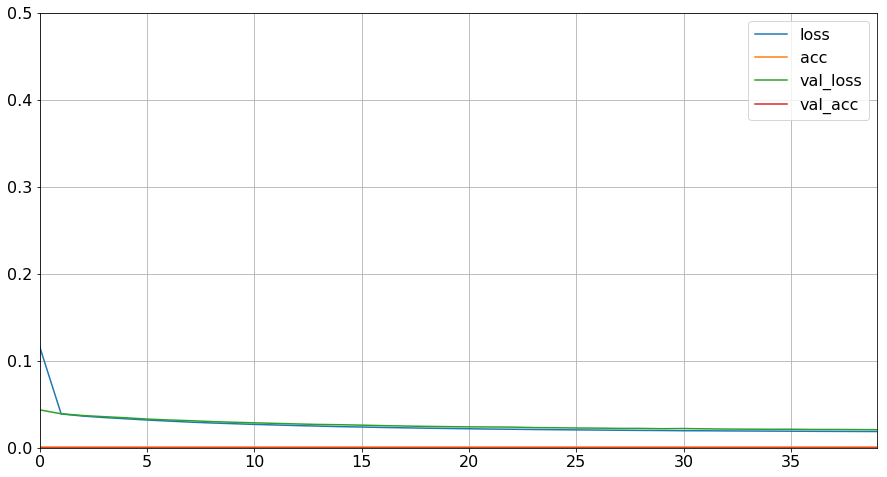

In [26]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0, 0.5) # set the vertical range to [0-1]
plt.show()

In [27]:
score, acc = model2.evaluate(X_train, y_train)
print('Test score:', score)
print('Test accuracy:', acc)

772/772 [==============================] - 0s 24us/sample - loss: 0.0188 - acc: 0.0013
Test score: 0.018848269289948164
Test accuracy: 0.0012953368


In [28]:
score, acc = model2.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

258/258 [==============================] - 0s 34us/sample - loss: 0.0199 - acc: 0.0039
Test score: 0.019866766667989796
Test accuracy: 0.003875969


In [29]:
y_pred = model2.predict(X_train)

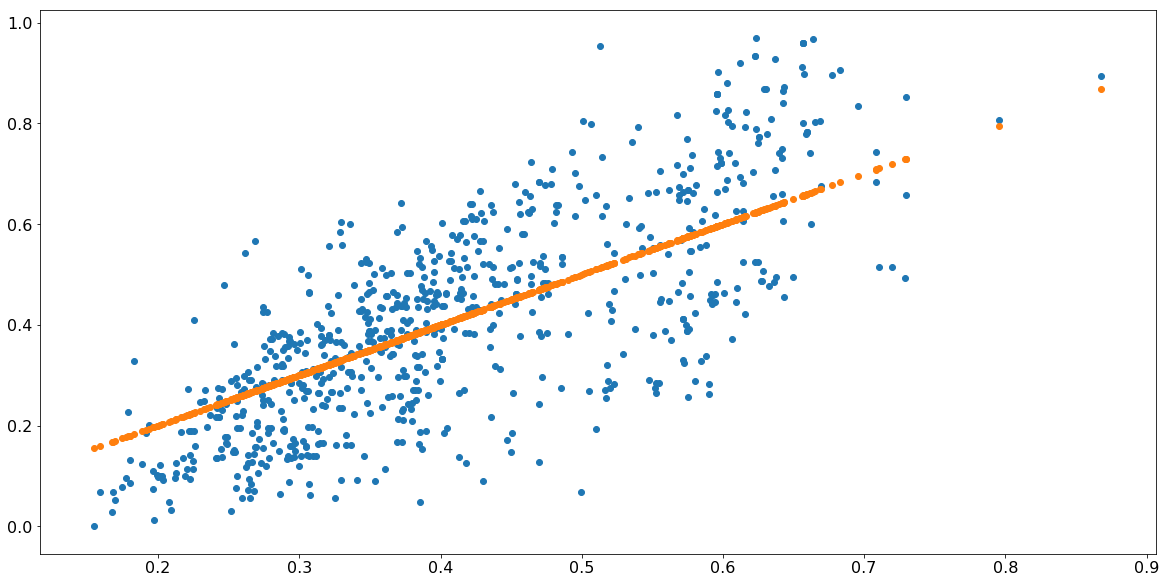

In [152]:
plt.figure(figsize=(20,10))
plt.rc('font',size = 16)
plt.scatter(y_pred, y_train)
plt.scatter(y_pred, y_pred)
plt.show()

In [30]:
for a, b in zip(np.array(y_train),model2.predict(X_train)):
    print (a," ", b)

[0.57954404]   [0.39137298]
[0.49009593]   [0.55275214]
[0.12109132]   [0.1836061]
[0.43739878]   [0.35733593]
[0.3556746]   [0.38397205]
[0.45396786]   [0.4434381]
[0.23097047]   [0.21563478]
[0.85922512]   [0.669593]
[0.42743242]   [0.3480904]
[0.64768905]   [0.49966717]
[0.03201694]   [0.1576613]
[0.29874175]   [0.31897825]
[0.1541049]   [0.31866503]
[0.06752211]   [0.40826863]
[0.85175034]   [1.083926]
[0.09007101]   [0.36997914]
[0.15161331]   [0.22925557]
[0.17652921]   [0.32172537]
[0.44711598]   [0.7627622]
[0.32104148]   [0.5618085]
[0.7984303]   [0.56852007]
[0.29737137]   [0.1720223]
[0.42319671]   [0.29518527]
[0.28267099]   [0.6387685]
[0.28466426]   [0.22834428]
[0.48012956]   [0.44711852]
[0.15036751]   [0.14630897]
[0.38270836]   [0.39878726]
[0.306964]   [0.29534948]
[0.60707612]   [0.50188464]
[0.52173913]   [0.3933459]
[0.44325402]   [0.47263515]
[0.33499439]   [0.26567107]
[0.45758067]   [0.42413312]
[0.38881276]   [0.319732]
[0.34309206]   [0.33103925]
[0.26610191]

[0.15871434]   [0.13556553]
[0.38283294]   [0.23587666]
[0.51289398]   [0.38010842]
[0.13653918]   [0.26052946]
[0.38445247]   [0.23342316]
[0.29811885]   [0.30246884]
[0.30546904]   [0.26538032]
[0.32353308]   [0.6424585]
[0.24230721]   [0.45328218]
[0.57082347]   [0.471376]
[0.13865703]   [0.43670595]
[0.57767535]   [0.3904556]
[0.68145011]   [0.6644817]
[0.71209667]   [0.5680262]
[0.31767784]   [0.23827823]
[0.66363523]   [0.6127799]
[0.0773639]   [0.22455709]
[0.68855114]   [0.6523194]
[0.66413355]   [0.5128848]
[0.46057057]   [0.6428825]
[0.22112869]   [0.24269645]
[0.3873178]   [0.38437426]
[0.51538557]   [0.7128422]
[0.64843653]   [0.49145532]
[0.4317927]   [0.42530906]
[0.55923757]   [0.5469234]
[0.1857481]   [0.3433534]
[0.80702629]   [0.7845183]
[0.49071882]   [0.38434654]
[0.3063411]   [0.29271442]
[0.62501557]   [0.4944657]
[0.1309331]   [0.12489308]
[0.28105145]   [0.21905167]
[0.59349695]   [0.42856133]
[0.52286035]   [0.35277683]
[0.44038869]   [0.354051]
[0.65117728]   

[0.58390432]   [0.68883103]
[0.88027906]   [0.66869]
[0.62526473]   [0.6060294]
[0.05581164]   [0.21654929]
[0.67870936]   [0.45289457]
[0.37859723]   [0.24011366]
[0.90519497]   [0.5320216]
[0.44088701]   [0.4089164]
[0.23483244]   [0.29034996]
[0.12358291]   [0.16588916]
[0.46044599]   [0.37676638]
[0.13965367]   [0.3076644]
[0.64320419]   [0.47014064]
[0.09231344]   [0.20334293]
[0.43714962]   [0.35610938]
[0.65690794]   [0.499887]
[0.40824717]   [0.571271]
[0.30559362]   [0.3683173]
[0.46156721]   [0.51075286]
[0.06864333]   [0.14428999]
[0.56858104]   [0.63282824]
[0.48635854]   [0.6141974]
[0.36152984]   [0.32752728]
[0.16556621]   [0.22409616]
[0.12956273]   [0.1940356]
[0.2679706]   [0.350429]
[0.3605332]   [0.35130948]
[0.52672231]   [0.4152252]
[0.38968481]   [0.2870447]
[0.18138782]   [0.25458407]
[0.1199701]   [0.259261]
[0.48299489]   [0.62218714]
[0.13653918]   [0.26135725]
[0.42942569]   [0.4446581]
[0.27158341]   [0.32794166]
[0.29139155]   [0.28359932]
[0.58377974]   [

In [31]:
y_pred= model2.predict(X_test)

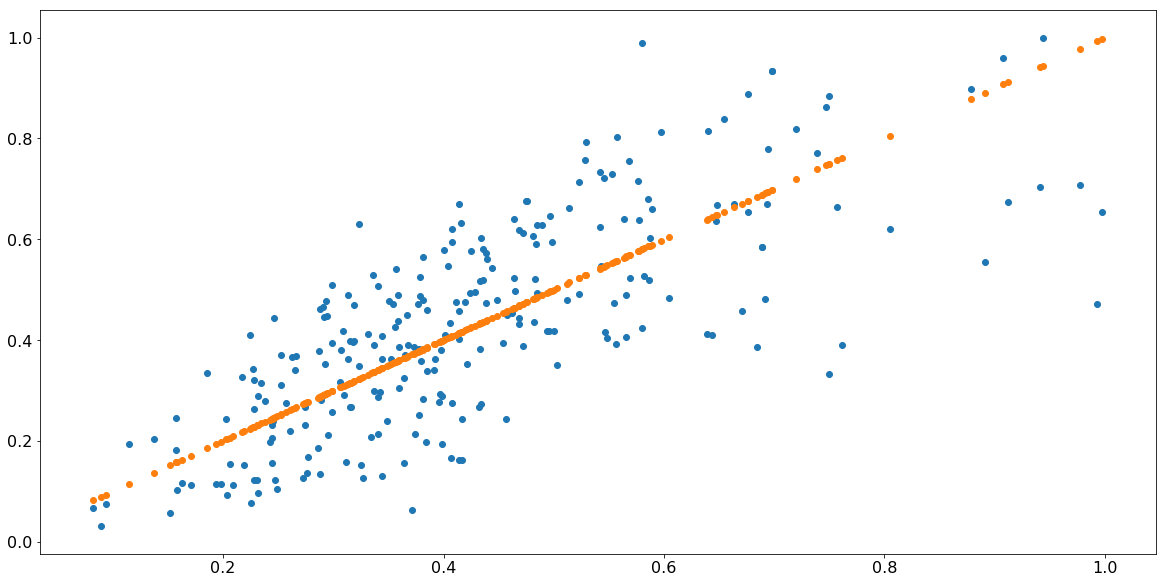

In [32]:
plt.figure(figsize=(20,10))
plt.rc('font',size = 16)
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)
plt.show()